In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir('C:/res/Version_3/RQ2/')


In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')

In [26]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
styles= ['-','--','-.',':']
results = {}
metrics = ['defect_expertiseloss','expertiseloss','far','workload']
metric_legend={'defect_expertiseloss':'CSR','expertiseloss':'expertise','far':'FaR','workload':'CoreWorkload'}
def drawPlot(data,repo,showLegend):
    plt.figure()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    i=0;
    for metric in metrics:
        plt.plot(thresholds, data[metric], label=metric_legend[metric], linestyle=styles[i%len(styles)] )
        i+=1
    if showLegend:
        plt.legend()
    plt.ylabel(f"Median percentage of change for {repo}")

    plt.xlabel(r"Value of $P_D$")
    ax.xaxis.grid(True) # Show the vertical gridlines

    image_format = 'svg' # e.g .png, .svg, etc.
    image_name = f'{repo}_change_median.svg'

    plt.savefig(f'./{image_name}', format=image_format, dpi=1200)

graph = {}
def getResults(repo,showLegend):
    for thr in thresholds: 
        results[thr] = {}
        for metric in metrics:
            temp = pd.read_csv(f'./{repo}/{thr}/{metric}.csv')
            results[thr][metric] = temp[temp['PeriodId']=='Median'].to_numpy()[0][1]
        
    global graph
    graph = {}
    for metric in metrics:
        graph[metric] = [v[metric] for k, v in results.items()]
#     print(graph)
#     print(results)
    drawPlot(graph,repo,showLegend)

Roslyn
exp 12.417609664853499 8.10759287132141
far -10.0 -37.5
workload 4.87804878048781 -0.848765432098764
CaR 73.0545329299197 51.9651179717895
Rust
exp 5.13925822638113 4.7297569295075395
far -18.952561669829198 -25.0638817669351
workload 0.0 0.0
CaR 74.8704322394773 73.2933157685477
Kubernetes
exp 12.505031185924599 9.48041699471969
far -15.625 -29.527559055118104
workload 2.06812652068127 -3.45086271567892
CaR 99.1554966077233 95.97046704890829


<Figure size 432x288 with 0 Axes>

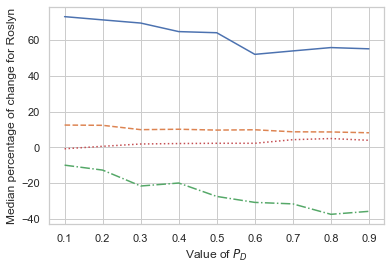

<Figure size 432x288 with 0 Axes>

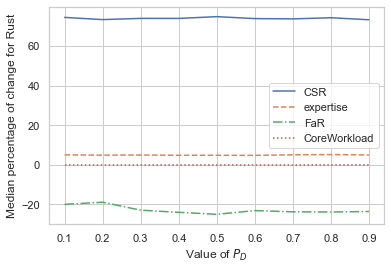

<Figure size 432x288 with 0 Axes>

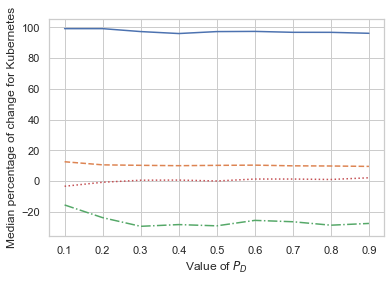

In [27]:
repos=['Roslyn','Rust','Kubernetes']
for repo in repos:
    print(repo)
    getResults(repo,repo=="Rust")
    print('exp',max(graph['expertiseloss']),min(graph['expertiseloss']))
    print('far',max(graph['far']),min(graph['far']))
    print('workload',max(graph['workload']),min(graph['workload']))
    print('CaR',max(graph['defect_expertiseloss']),min(graph['defect_expertiseloss']))
# far=map(results, lambda x: x['far'])
# print(far)

Roslyn
Rust
Kubernetes
exp 8.37523480835788
far -24.765065552453446
workload 0.8656573279720791
CaR 77.81032808571128


<Figure size 432x288 with 0 Axes>

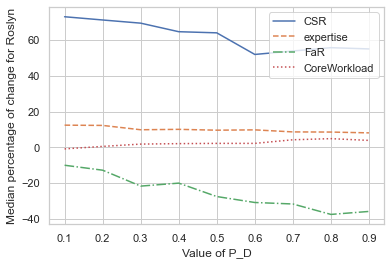

<Figure size 432x288 with 0 Axes>

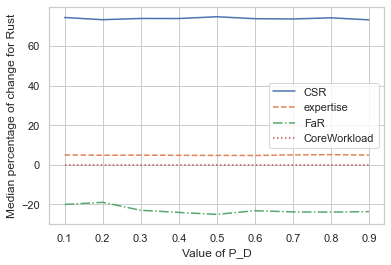

<Figure size 432x288 with 0 Axes>

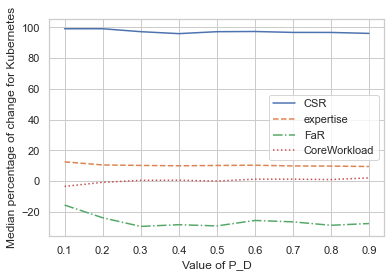

In [23]:
import statistics

metric_avg={'expertiseloss':0,'far':0,'workload':0,'CaR':0}
for repo in repos:
    print(repo)
    getResults(repo)
    metric_avg['expertiseloss'] += statistics.mean(graph['expertiseloss'])
    metric_avg['far'] += statistics.mean(graph['far'])
    metric_avg['workload'] += statistics.mean(graph['workload'])
    metric_avg['CaR'] += statistics.mean(graph['defect_expertiseloss'])


    
print('exp',metric_avg['expertiseloss']/len(repos))
print('far',metric_avg['far']/len(repos))
print('workload',metric_avg['workload']/len(repos))
print('CaR',metric_avg['CaR']/len(repos))
